In [6]:
import glob
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
all_files = glob.glob("*.csv")


In [11]:
auc_df = pd.DataFrame(columns=["training_file", "RF_AUC_Val", "LR_AUC_Val", "DT_AUC_Val", "MLP_AUC_Val", "XGB_AUC_Val", "SVM_AUC_Val" ])
from matplotlib.backends.backend_pdf import PdfPages
list_of_graph = []
for file in all_files:
    print("=== Started processing for ", file)
    data = pd.read_csv(file)
    data = data.drop('File', axis=1)
    X = data.iloc[:,0:]  #independent columns
    y = data.iloc[:,-1]    #target column i.e Realbug
    
    
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    # feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    # feat_importances.nlargest(10).plot(kind='barh')
    # plt.show()
    ## Load Data and preparing datasets

    # Import for Load Data


    # Import for Split Data into Training and Testing Samples
    
    print("Training file: ", file)
    train_dataset = pd.read_csv((file), index_col = 'File')
    test_dataset = pd.read_csv(('lucene-3.1.csv'), index_col = 'File')

    outcome = 'RealBug'
    features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine']
    ## 'HeuBugCount', 'DDEV', 'HeuBug', 'RealBugCount'
    # commits - # of commits that modify the file of interest
    # Added lines - # of added lines of code
    # Count class coupled - # of classes that interact or couple with the class of interest
    # LOC - # of lines of code
    # RatioCommentToCode - The ratio of lines of comments to lines of code

    # process outcome to 0 and 1
    train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
    train_dataset[outcome] = train_dataset[outcome].cat.codes

    test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
    test_dataset[outcome] = test_dataset[outcome].cat.codes

    X_train = train_dataset.loc[:, features]
    X_test = test_dataset.loc[:, features]

    y_train = train_dataset.loc[:, outcome]
    y_test = test_dataset.loc[:, outcome]

    class_labels = ['Clean', 'Defective']

    X_train.columns = features
    X_test.columns = features
    training_data = pd.concat([X_train, y_train], axis=1)
    testing_data = pd.concat([X_test, y_test], axis=1)
    
    our_rf_model = RandomForestClassifier(random_state=0)
    our_rf_model.fit(X_train, y_train)
    
    y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    rf_auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label=file + " RF AUC="+str(rf_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    fig1 = plt.gcf()
    list_of_graph.append(fig1)
#     fig.savefig('fig1.png')
    plt.show()
    
    
    
    # ------ logistic regression
    
    our_lr_model = LogisticRegression(random_state=0)
    our_lr_model.fit(X_train, y_train)
    
    y_pred_proba = our_lr_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    lr_auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label=file+" LR AUC="+str(lr_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    fig2 = plt.gcf()
#     fig.savefig('fig2.png')
    list_of_graph.append(fig2)
    plt.show()
    #auc_df.loc[len(auc_df)]=[file,rf_auc,lr_auc]
    
    

    
     # ------ Decission Tree
    our_dt_model = DecisionTreeClassifier()
    our_dt_model.fit(X_train,y_train)
    
    y_pred_proba = our_dt_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    dt_auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("dt_auc: ", dt_auc)

    #create ROC curve
    plt.plot(fpr,tpr,label=file+" DT AUC="+str(dt_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    fig3 = plt.gcf()
    #fig.savefig('fig3.png')
    list_of_graph.append(fig3)
    plt.show()
    
    
    
        # ------ MLP
        
    our_mlp_model = MLPClassifier()
    our_mlp_model.fit(X_train,y_train)
    
    y_pred_proba = our_mlp_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    mlp_auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("mlp_auc: ", mlp_auc)

    #create ROC curve
    plt.plot(fpr,tpr,label=file+" MLP AUC="+str(mlp_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    fig4 = plt.gcf()
    #fig.savefig('fig4.png')
    list_of_graph.append(fig4)
    plt.show()
    
    
         # ------ XGB
        
    our_xgb_model = XGBClassifier()
    our_xgb_model.fit(X_train,y_train)
    
    y_pred_proba = our_xgb_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    xgb_auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("xgb_auc: ", xgb_auc)

    #create ROC curve
    plt.plot(fpr,tpr,label=file+" XGB AUC="+str(xgb_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    fig5 = plt.gcf()
    #fig.savefig('fig4.png')
    list_of_graph.append(fig5)
    plt.show()
    
    
    
     # ------ SVM
        
        
    ## For SVM data fitting
    
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)    
        
    our_svm_model = svm.SVC(probability=True)
    our_svm_model.fit(X_train [:500], y_train[:500])
    
    y_pred_proba = our_svm_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    svm_auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("svm_auc: ", svm_auc)

    #create ROC curve
    plt.plot(fpr,tpr,label=file+" SVM AUC="+str(svm_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    fig6 = plt.gcf()
    #fig.savefig('fig4.png')
    list_of_graph.append(fig6)
    plt.show()
    
    
    
    auc_df.loc[len(auc_df)]=[file,rf_auc,lr_auc,dt_auc, mlp_auc, xgb_auc, svm_auc ]

# f, axes = plt.subplots(1, 6)

# sns.boxplot(auc_df['RF_AUC_Val'], ax=axes[0])
# sns.boxplot(auc_df['LR_AUC_Val'], ax=axes[1])
# sns.boxplot(auc_df['DT_AUC_Val'], ax=axes[2])
# sns.boxplot(auc_df['MLP_AUC_Val'], ax=axes[3])
# sns.boxplot(auc_df['XGB_AUC_Val'], ax=axes[4])
# sns.boxplot(auc_df['SVM_AUC_Val'], ax=axes[5])
# fig7 = plt.gcf()
# plt.show()    
# list_of_graph.append(fig7)
# pp = PdfPages('Figure for Chi-square_FE.pdf')
# for i in list_of_graph:
#     pp.savefig(i)
# pp.close()
    
# auc_df.to_csv("auc_result.csv", index=False)

=== Started processing for  Chi_Rank Agreement.csv


ValueError: could not convert string to float: 'LIME'

In [13]:
# df = pd.DataFrame(data=auc_df, columns=["LIME","SHAP","BreakDown","PyExplainer"])
df = pd.read_csv("Chi_Rank Agreement.csv")
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

## Boxplot with Data Points

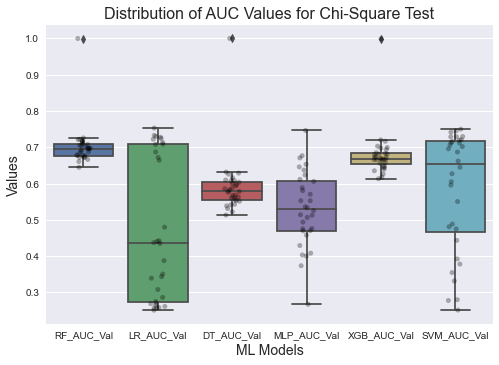

In [11]:

df = pd.DataFrame(data=auc_df, columns=["RF_AUC_Val", "LR_AUC_Val", "DT_AUC_Val", "MLP_AUC_Val", "XGB_AUC_Val", "SVM_AUC_Val"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df))
boxplot.axes.set_title("Distribution of AUC Values for Chi-Square Test", fontsize=16)
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df), marker="o", alpha=0.3, color="black", order=["RF_AUC_Val", "LR_AUC_Val", "DT_AUC_Val", "MLP_AUC_Val", "XGB_AUC_Val", "SVM_AUC_Val"])
boxplot.set_xlabel("ML Models", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()



In [5]:
import heapq
fr = auc_df["RF_AUC_Val"].values.tolist()
max_index = heapq.nlargest(2, range(len(fr)), key=fr.__getitem__)

In [6]:
sort_dict = {}
columns=["RF_AUC_Val", "LR_AUC_Val", "DT_AUC_Val", "MLP_AUC_Val", "XGB_AUC_Val", "SVM_AUC_Val"]
for cols in columns:
#     max_val = sorted(auc_df[cols].values.tolist())[-2]
    fr = auc_df[cols].values.tolist()
    max_val = heapq.nlargest(2, range(len(fr)), key=fr.__getitem__)
    min_val = heapq.nsmallest(1, range(len(fr)), key=fr.__getitem__)
#     min_val = sorted(auc_df[cols].values.tolist())[0]
    sort_dict[cols+"_max"] = [auc_df["training_file"].values.tolist()[max_val[1]],  auc_df[cols].values.tolist()[max_val[1]]]
    sort_dict[cols+"_min"] = [auc_df["training_file"].values.tolist()[min_val[0]],  auc_df[cols].values.tolist()[min_val[0]]]
sort_dict

{'RF_AUC_Val_max': ['activemq-5.1.0.csv', 0.7258226480558739],
 'RF_AUC_Val_min': ['jruby-1.7.0.preview1.csv', 0.6447524697620786],
 'LR_AUC_Val_max': ['hive-0.9.0.csv', 0.7328034266758543],
 'LR_AUC_Val_min': ['hive-0.12.0.csv', 0.2510171645434619],
 'DT_AUC_Val_max': ['jruby-1.4.0.csv', 0.6447386190108486],
 'DT_AUC_Val_min': ['wicket-1.3.0-incubating-beta-1.csv', 0.5144515275647262],
 'MLP_AUC_Val_max': ['derby-10.2.1.6.csv', 0.679580183730215],
 'MLP_AUC_Val_min': ['wicket-1.3.0-incubating-beta-1.csv', 0.2832582507193734],
 'XGB_AUC_Val_max': ['camel-2.9.0.csv', 0.720400078949282],
 'XGB_AUC_Val_min': ['camel-2.11.0.csv', 0.6133649361307234],
 'SVM_AUC_Val_max': ['wicket-1.5.3.csv', 0.7424279674368839],
 'SVM_AUC_Val_min': ['lucene-2.3.0.csv', 0.2514084482657128]}

In [7]:
auc_df

,training_file,RF_AUC_Val,LR_AUC_Val,DT_AUC_Val,MLP_AUC_Val,XGB_AUC_Val,SVM_AUC_Val
0,activemq-5.2.0.csv,0.685425,0.257489,0.580267,0.632604,0.665913,0.686402
1,derby-10.5.1.1.csv,0.696241,0.442286,0.587987,0.609902,0.671796,0.720911
2,hive-0.9.0.csv,0.721209,0.732803,0.622304,0.518617,0.694463,0.729720
3,activemq-5.0.0.csv,0.702920,0.724484,0.553147,0.565211,0.668643,0.662168
4,jruby-1.4.0.csv,0.707787,0.664462,0.644739,0.477293,0.681069,0.706146
5,hbase-0.94.0.csv,0.678599,0.350563,0.602478,0.463463,0.647743,0.277805
6,camel-2.11.0.csv,0.660736,0.261469,0.527205,0.580130,0.613365,0.715604
7,jruby-1.1.csv,0.666441,0.713418,0.559742,0.520232,0.665743,0.488478
8,jruby-1.7.0.preview1.csv,0.644752,0.263815,0.517857,0.336892,0.643684,0.389956
9,activemq-5.1.0.csv,0.725823,0.707936,0.600245,0.583328,0.672793,0.644957
